# Regression

This notebook estimates the area of squares and circles, in pixels. 

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim

from cnn_framework.dummy_regression_cnn.data_set import DummyRegressionCnnDataSet
from cnn_framework.dummy_regression_cnn.model_params import DummyModelParams
from cnn_framework.dummy_regression_cnn.model import DummyCnn

from cnn_framework.utils.data_loader_generators.data_loader_generator import DataLoaderGenerator
from cnn_framework.utils.model_managers.regression_model_manager import RegressionModelManager
from cnn_framework.utils.data_managers.default_data_manager import DefaultDataManager
from cnn_framework.utils.metrics.mean_error_metric import MeanErrorMetric
from cnn_framework.utils.create_dummy_data_set import generate_data_set

c:\Users\thoma\anaconda3\envs\pytorch-env2\lib\site-packages\pydantic\_migration.py:281: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [2]:
params = DummyModelParams()
params.update()

print(f"\nModel will be saved in {params.models_folder}")
print(f"Predictions will be saved in {params.output_dir}")
print(f"Tensorboard logs will be saved in {params.tensorboard_folder_path}")

Model time id: 20231117-150213-local
epochs 25 | batch 32 | lr 0.001 | weight decay 0.0 | dropout 0.0 | c [0, 1, 2] | z [0]

Model will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\models/dummy_regression_cnn/20231117-150213-local
Predictions will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\predictions/dummy_regression_cnn/20231117-150213-local
Tensorboard logs will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\tensorboard/20231117-150213-local_dummy_regression_cnn


In [3]:
loader_generator = DataLoaderGenerator(params, DummyRegressionCnnDataSet, DefaultDataManager)
train_dl, val_dl, test_dl = loader_generator.generate_data_loader()

### Data source ###
train data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 80% elements
val data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 10% elements
test data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 10% elements
###################
train has 1600 images.
val has 200 images.
test has 200 images.
###################


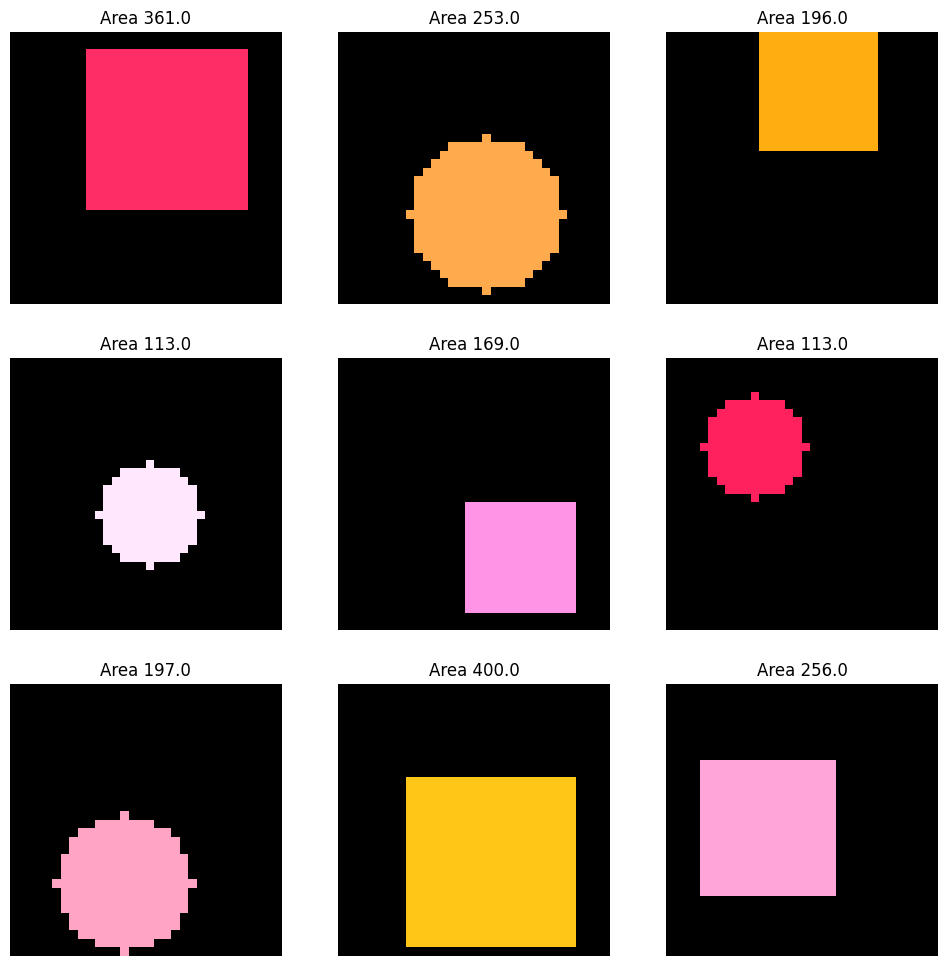

In [5]:
fig = plt.figure(figsize=(12, 12))

for img_index, single_dl_element in enumerate(train_dl.dataset):    
    if img_index == 9:
        break
    numpy_input = single_dl_element.input.detach().cpu().numpy()
    ax = fig.add_subplot(3, 3, img_index+1)
    ax.imshow(numpy_input)
    ax.axis('off')
    ax.set_title(f"Area {single_dl_element.target[0].item()}")

plt.show()

In [6]:
model = DummyCnn(
    nb_classes=params.nb_classes,
    nb_input_channels=len(params.c_indexes) * len(params.z_indexes),
)

manager = RegressionModelManager(model, params, MeanErrorMetric)

optimizer = optim.Adam(
    model.parameters(), lr=float(params.learning_rate), betas=(params.beta1, params.beta2),
)  # define the optimization

loss_function = nn.L1Loss()  # define the loss function

Current commit hash: e7a4769a71ffc0bf4d925523fcf94a032ba11f97


In [7]:
manager.fit(train_dl, val_dl, optimizer, loss_function)

Training in progress: 100.0% | Local step 50 | Epoch 25
Best model saved at epoch 23.

Training successfully finished in 0:01:37.638156.


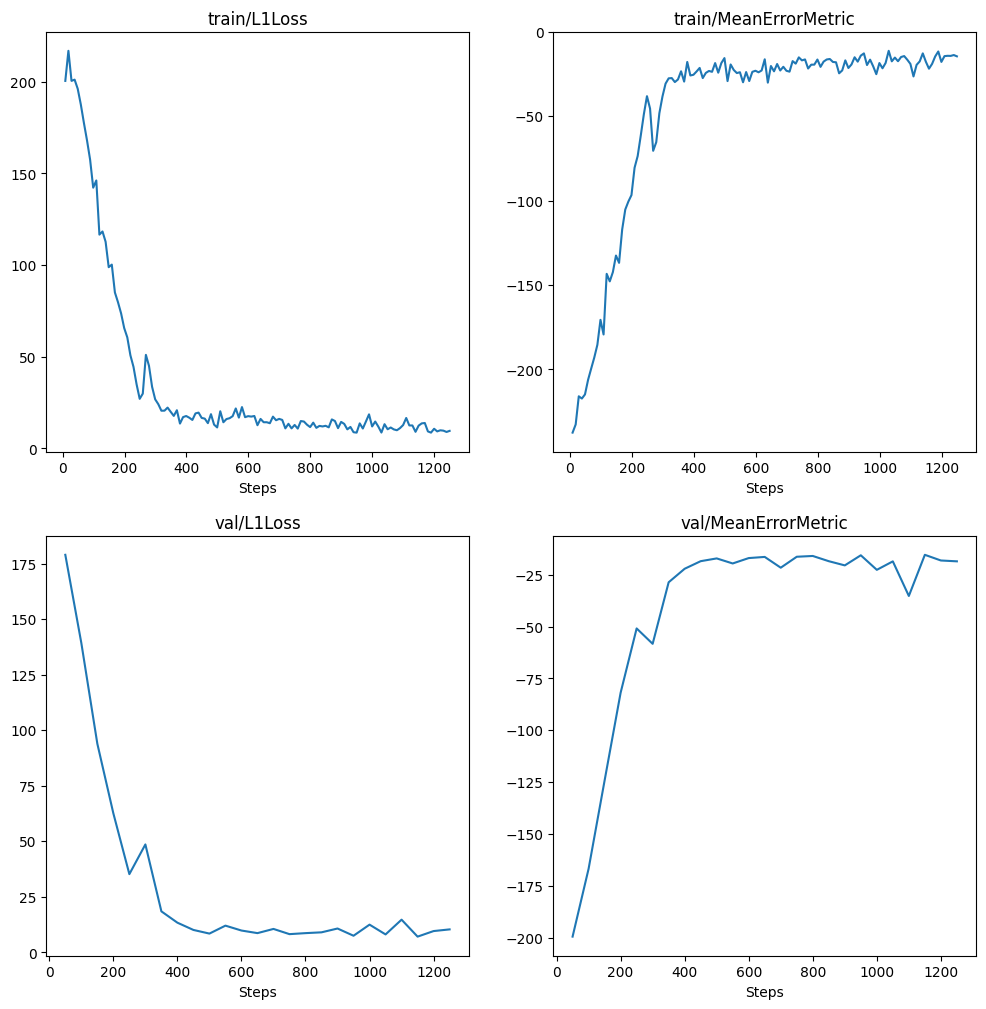

In [9]:
manager.display_training_curves()

In [8]:
for model_path, name in zip(
    [manager.model_save_path_early_stopping, manager.model_save_path],
    ["early stopping", "final"],
):
    print(f"\nPredicting with {name} model.")
    # Update model with saved one
    manager.model.load_state_dict(torch.load(model_path))
    manager.predict(test_dl)


Predicting with early stopping model.
Model evaluation in progress: 100.0% | Batch #6
Average MeanError: -8.03

Predicting with final model.
Model evaluation in progress: 100.0% | Batch #6
Average MeanError: -13.21
